obtained datasets from 
https://www.nflfootballstadiums.com
https://www.kaggle.com
https://www.espn.com/nfl/story/_/page/32for32x160705/biggest-rival-all-32-nfl-teams-green-bay-packers-minnesota-vikings-washington-redskins-dallas-cowboys 

In this project we are analyzing the effects of home-field advantage in the NFL. We are analyzing if factors such as rivalries, travel distance, weather, and wind have an affect on the games outcome. 

In [214]:
import pandas as pd
import numpy as np


# Load datasets with relative paths
game_data = pd.read_csv('../raw_spreadspoke_scores.csv')
travel_distances = pd.read_csv('../raw_nfl_stadium_distances.csv')


In [167]:
print("Data types in Game Data:")
print(game_data.dtypes, "\n")

Data types in Game Data:
schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
stadium                 object
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
home_stadium            object
away_stadium            object
dtype: object 



In [59]:
print("Data types in Travel Distances:")
print(travel_distances.dtypes, "\n")

Data types in Travel Distances:
Stadium 1            object
Stadium 2            object
Distance (miles)    float64
dtype: object 



In [ ]:
print("Missing values in Game Data:")
print(game_data.isnull().sum(), "\n")

In [ ]:
print("Missing values in Travel Distances:")
print(travel_distances.isnull().sum(), "\n")

Obtaining only the past 18 years in all the datasets as this is where there is the most data. 

In [215]:
# Filter the dataset to only include rows where schedule_season is between 2005 and 2023
filtered_scores = game_data[(game_data['schedule_season'] >= 2005) & (game_data['schedule_season'] <= 2023)]

# Display the filtered dataset
print(filtered_scores.tail())

# Save the filtered dataset back to a CSV file
# filtered_scores.to_csv('filtered_spreadspoke_scores_2005_2023.csv', index=False)

      schedule_date  schedule_season schedule_week  schedule_playoff  \
13796     1/21/2024             2023      Division              True   
13797     1/21/2024             2023      Division              True   
13798     1/28/2024             2023    Conference              True   
13799     1/28/2024             2023    Conference              True   
13800     2/11/2024             2023     Superbowl              True   

                 team_home  score_home  score_away             team_away  \
13796        Buffalo Bills        24.0        27.0    Kansas City Chiefs   
13797        Detroit Lions        31.0        23.0  Tampa Bay Buccaneers   
13798     Baltimore Ravens        10.0        17.0    Kansas City Chiefs   
13799  San Francisco 49ers        34.0        31.0         Detroit Lions   
13800   Kansas City Chiefs        25.0        22.0   San Francisco 49ers   

      team_favorite_id  spread_favorite over_under_line            stadium  \
13796              BUF          

In [216]:
game_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [219]:
# # Rounding all the distances in the nfl_stadium_distances file to whole numbers 
travel_distances['Distance (miles)'] = travel_distances['Distance (miles)'].round(0).astype(int)
# # travel_distances.to_csv('nfl_stadium_distances_rounded.csv', index=False)
# travel_distances = pd.read_csv('../filtered_stadium_distances.csv')

In [222]:
# game_data = game_data.drop(columns=['weather_detail', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium_neutral'])
# game_data.to_csv('final_filtered_game_data.csv', index=False)
game_data = pd.read_csv('../final_filtered_game_data.csv')
game_data.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium
0,0,9/8/2005,2005,1,False,New England Patriots,30.0,20.0,Las Vegas Raiders,Gillette Stadium,71.0,9.0,64.0,Gillette Stadium,Allegiant Stadium
1,1,9/11/2005,2005,1,False,Baltimore Ravens,7.0,24.0,Indianapolis Colts,M&T Bank Stadium,69.0,4.0,63.0,M&T Bank Stadium,Lucas Oil Stadium
2,2,9/11/2005,2005,1,False,Buffalo Bills,22.0,7.0,Houston Texans,Ralph Wilson Stadium,64.0,8.0,58.0,Highmark Stadium,NRG Stadium
3,3,9/11/2005,2005,1,False,Carolina Panthers,20.0,23.0,New Orleans Saints,Bank of America Stadium,74.0,12.0,49.0,Bank of America Stadium,Caesars Superdome
4,4,9/11/2005,2005,1,False,Cleveland Browns,13.0,27.0,Cincinnati Bengals,FirstEnergy Stadium,69.0,6.0,63.0,FirstEnergy Stadium,Paycor Stadium


In [224]:
travel_distances = pd.read_csv('../real_stadium_distance.csv')

In [225]:
team_to_stadium = {
    'Arizona Cardinals': 'State Farm Stadium',
    'Atlanta Falcons': 'Mercedes-Benz Stadium',
    'Baltimore Ravens': 'M&T Bank Stadium',
    'Buffalo Bills': 'Highmark Stadium',
    'Carolina Panthers': 'Bank of America Stadium',
    'Chicago Bears': 'Soldier Field',
    'Cincinnati Bengals': 'Paycor Stadium',
    'Cleveland Browns': 'FirstEnergy Stadium',
    'Dallas Cowboys': 'AT&T Stadium',
    'Denver Broncos': 'Empower Field at Mile High',
    'Detroit Lions': 'Ford Field',
    'Green Bay Packers': 'Lambeau Field',
    'Houston Texans': 'NRG Stadium',
    'Indianapolis Colts': 'Lucas Oil Stadium',
    'Jacksonville Jaguars': 'TIAA Bank Field',
    'Kansas City Chiefs': 'Arrowhead Stadium',
    'Las Vegas Raiders': 'Allegiant Stadium',
    'Los Angeles Chargers': 'SoFi Stadium',
    'Los Angeles Rams': 'SoFi Stadium',
    'Miami Dolphins': 'Hard Rock Stadium',
    'Minnesota Vikings': 'U.S. Bank Stadium',
    'New England Patriots': 'Gillette Stadium',
    'New Orleans Saints': 'Caesars Superdome',
    'New York Giants': 'MetLife Stadium',
    'New York Jets': 'MetLife Stadium',
    'Philadelphia Eagles': 'Lincoln Financial Field',
    'Pittsburgh Steelers': 'Acrisure Stadium',
    'San Francisco 49ers': 'Levi\'s Stadium',
    'Seattle Seahawks': 'Lumen Field',
    'Tampa Bay Buccaneers': 'Raymond James Stadium',
    'Tennessee Titans': 'Nissan Stadium',
    'Washington Commanders': 'FedExField'
}

In [226]:

# Updated dictionary to replace old team names with current names
team_name_changes = {
    'Oakland Raiders': 'Las Vegas Raiders',
    'San Diego Chargers': 'Los Angeles Chargers',
    'St. Louis Rams': 'Los Angeles Rams',
    'Washington Redskins': 'Washington Commanders',
    'Washington Football Team': 'Washington Commanders'
}

# Replace old team names in the home and away team columns
game_data['team_home'] = game_data['team_home'].replace(team_name_changes)
game_data['team_away'] = game_data['team_away'].replace(team_name_changes)

# Display the updated game data
game_data[game_data['team_home']=='Washington Commanders']


,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium
14,14,9/11/2005,2005,1,False,Washington Commanders,9.0,7.0,Chicago Bears,FedEx Field,73.0,6.0,55.0,FedExField,Soldier Field
58,58,10/2/2005,2005,4,False,Washington Commanders,20.0,17.0,Seattle Seahawks,FedEx Field,68.0,5.0,60.0,FedExField,Lumen Field
100,100,10/23/2005,2005,7,False,Washington Commanders,52.0,17.0,San Francisco 49ers,FedEx Field,55.0,11.0,58.0,FedExField,Levi's Stadium
128,128,11/6/2005,2005,9,False,Washington Commanders,17.0,10.0,Philadelphia Eagles,FedEx Field,62.0,10.0,73.0,FedExField,Lincoln Financial Field
158,158,11/20/2005,2005,11,False,Washington Commanders,13.0,16.0,Las Vegas Raiders,FedEx Field,45.0,6.0,52.0,FedExField,Allegiant Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4963,10/29/2023,2023,8,False,Washington Commanders,31.0,38.0,Philadelphia Eagles,FedEx Field,NaN,NaN,NaN,FedExField,Lincoln Financial Field
5005,5005,11/19/2023,2023,11,False,Washington Commanders,19.0,31.0,New York Giants,FedEx Field,NaN,NaN,NaN,FedExField,MetLife Stadium
5034,5034,12/3/2023,2023,13,False,Washington Commanders,15.0,45.0,Miami Dolphins,FedEx Field,NaN,NaN,NaN,FedExField,Hard Rock Stadium
5098,5098,12/31/2023,2023,17,False,Washington Commanders,10.0,27.0,San Francisco 49ers,FedEx Field,NaN,NaN,NaN,FedExField,Levi's Stadium


In [227]:
# Add home and away stadium columns to the game data
game_data['home_stadium'] = game_data['team_home'].map(team_to_stadium)
game_data['away_stadium'] = game_data['team_away'].map(team_to_stadium)

# Display the updated game data
game_data.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium
0,0,9/8/2005,2005,1,False,New England Patriots,30.0,20.0,Las Vegas Raiders,Gillette Stadium,71.0,9.0,64.0,Gillette Stadium,Allegiant Stadium
1,1,9/11/2005,2005,1,False,Baltimore Ravens,7.0,24.0,Indianapolis Colts,M&T Bank Stadium,69.0,4.0,63.0,M&T Bank Stadium,Lucas Oil Stadium
2,2,9/11/2005,2005,1,False,Buffalo Bills,22.0,7.0,Houston Texans,Ralph Wilson Stadium,64.0,8.0,58.0,Highmark Stadium,NRG Stadium
3,3,9/11/2005,2005,1,False,Carolina Panthers,20.0,23.0,New Orleans Saints,Bank of America Stadium,74.0,12.0,49.0,Bank of America Stadium,Caesars Superdome
4,4,9/11/2005,2005,1,False,Cleveland Browns,13.0,27.0,Cincinnati Bengals,FirstEnergy Stadium,69.0,6.0,63.0,FirstEnergy Stadium,Paycor Stadium


In [228]:
#Check for missing values in away stadium
game_data[game_data['away_stadium'].isna()]

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium


In [230]:
#Check for missing values in home stadium

# Filter rows where home_stadium equals 'Washington Commanders' and check for NaN in away_stadium
#Debuigging
game_data[(game_data['team_away'] == 'Washington Commanders') & (game_data['home_stadium'].isna())]


,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium


In [163]:
#Update the file to represent the most recent changes
game_data.to_csv('final_filtered_game_data.csv')

In [13]:
# Find rows where home_stadium or away_stadium is NaN
nan_home_stadium = game_data[game_data['home_stadium'].isna()]
nan_away_stadium = game_data[game_data['away_stadium'].isna()]

# Display rows with NaN in home_stadium or away_stadium
print("Rows with NaN in home_stadium:")
nan_home_stadium.head()

print("Rows with NaN in away_stadium:")
nan_away_stadium.head()

NameError: name 'game_data' is not defined

In [129]:
#Updating file to most recent changes
game_data.to_csv('filtered_game_data_final.csv')

In [236]:
travel_distances = travel_distances.rename(columns={
    'Stadium 1': 'home_stadium',
    'Stadium 2': 'away_stadium',
    'Distance (miles)': 'travel_distance'
})

In [301]:
# Clean and standardize stadium names
game_data['home_stadium'] = game_data['home_stadium'].str.strip().str.lower()
game_data['away_stadium'] = game_data['away_stadium'].str.strip().str.lower()

travel_distances['home_stadium'] = travel_distances['home_stadium'].str.strip().str.lower()
travel_distances['away_stadium'] = travel_distances['away_stadium'].str.strip().str.lower()

travel_distances.tail()

,Unnamed: 0,home_stadium,away_stadium,distance
917,917,tiaa bank field,nissan stadium,517
918,918,u.s. bank stadium,nissan stadium,696
919,919,acrisure stadium,nissan stadium,536
920,920,m&t bank stadium,nissan stadium,588
921,921,nissan stadium,allegiant stadium,1800


In [314]:
#Updated my distance file, so now update the travel_distances variable by reading the file
travel_distances = pd.read_csv('../final_stadium_distances.csv')

In [315]:
# Merge the datasets on home and away stadiums
merged_game_data = pd.merge(game_data, travel_distances, how='left', left_on=['home_stadium', 'away_stadium'], right_on=['home_stadium', 'away_stadium'])

In [270]:
# Replace old stadium names with the new ones, in lowercase
merged_game_data['home_stadium'] = merged_game_data['home_stadium'].replace('heinz field', 'acrisure stadium')
merged_game_data['away_stadium'] = merged_game_data['away_stadium'].replace('heinz field', 'acrisure stadium')

# Verify that the changes have been made
print(merged_game_data[merged_game_data['home_stadium'] == 'acrisure stadium'].head())
print(merged_game_data[merged_game_data['away_stadium'] == 'acrisure stadium'].head())

     Unnamed: 0 schedule_date  schedule_season schedule_week  \
12           11     9/11/2005             2005             1   
42           40     9/25/2005             2005             3   
86           83    10/16/2005             2005             6   
120         115    10/31/2005             2005             8   
146         140    11/13/2005             2005            10   

     schedule_playoff            team_home  score_home  score_away  \
12              False  Pittsburgh Steelers        34.0         7.0   
42              False  Pittsburgh Steelers        20.0        23.0   
86              False  Pittsburgh Steelers        17.0        23.0   
120             False  Pittsburgh Steelers        20.0        19.0   
146             False  Pittsburgh Steelers        34.0        21.0   

                team_away      stadium  weather_temperature  weather_wind_mph  \
12       Tennessee Titans  Heinz Field                 68.0               4.0   
42   New England Patriots  Heinz

In [14]:
#Check if any distance values are nan
nan_rows = merged_game_data[merged_game_data['distance'].isna()]
nan_rows

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance,home_win_margin,home_team_won,temperature_category,wind_category


In [317]:
# Count the total number of NaN values in the 'distance' column
nan_count = merged_game_data['distance'].isna().sum()

# Output the count of NaN values
print(f"Total number of NaN values in the 'distance' column: {nan_count}")
#There are 324 NaN values, so figure out what is causing the problem
#Manually enter missing data into dataset

Total number of NaN values in the 'distance' column: 0


In [318]:
#save combined dataset into a file
merged_game_data.to_csv('merged_dataset.csv')

In [16]:
merged_game_data.tail()

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance,home_win_margin,home_team_won,temperature_category,wind_category
5393,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,Ford Field,72,0,ford field,raymond james stadium,1038,8.0,1,hot,none
5394,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,M&T Bank Stadium,47,7,m&t bank stadium,arrowhead stadium,983,-7.0,0,moderate,low
5395,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,M&T Bank Stadium,47,7,m&t bank stadium,arrowhead stadium,983,-7.0,0,moderate,low
5396,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,Levi's Stadium,69,5,levi's stadium,ford field,2317,3.0,1,moderate,low
5397,2023,Superbowl,True,Kansas City Chiefs,25,22,San Francisco 49ers,Allegiant Stadium,72,0,arrowhead stadium,levi's stadium,1811,3.0,1,hot,none


In [325]:
# Drop the first column (index 0)
# merged_game_data = merged_game_data.drop(merged_game_data.columns[0], axis=1)

# Verify the column has been dropped
merged_game_data.head()

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium,Unnamed: 0_y,distance
0,2005,1,False,New England Patriots,30.0,20.0,Las Vegas Raiders,Gillette Stadium,71.0,9.0,64.0,gillette stadium,allegiant stadium,36,2370
1,2005,1,False,New England Patriots,30.0,20.0,Las Vegas Raiders,Gillette Stadium,71.0,9.0,64.0,gillette stadium,allegiant stadium,304,2370
2,2005,1,False,Baltimore Ravens,7.0,24.0,Indianapolis Colts,M&T Bank Stadium,69.0,4.0,63.0,m&t bank stadium,lucas oil stadium,852,511
3,2005,1,False,Buffalo Bills,22.0,7.0,Houston Texans,Ralph Wilson Stadium,64.0,8.0,58.0,highmark stadium,nrg stadium,378,1301
4,2005,1,False,Carolina Panthers,20.0,23.0,New Orleans Saints,Bank of America Stadium,74.0,12.0,49.0,bank of america stadium,caesars superdome,139,652


# Done with the Data Preprocessing

In [327]:
# Calculate home win margin (home score - away score)
merged_game_data['home_win_margin'] = merged_game_data['score_home'] - merged_game_data['score_away']

In [330]:
merged_game_data.to_csv('filtered_distances.csv')

In [332]:
merged_game_data.head()

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_stadium,away_stadium,distance,home_win_margin
0,2005,1,False,New England Patriots,30.0,20.0,Las Vegas Raiders,Gillette Stadium,71.0,9.0,64.0,gillette stadium,allegiant stadium,2370,10.0
1,2005,1,False,New England Patriots,30.0,20.0,Las Vegas Raiders,Gillette Stadium,71.0,9.0,64.0,gillette stadium,allegiant stadium,2370,10.0
2,2005,1,False,Baltimore Ravens,7.0,24.0,Indianapolis Colts,M&T Bank Stadium,69.0,4.0,63.0,m&t bank stadium,lucas oil stadium,511,-17.0
3,2005,1,False,Buffalo Bills,22.0,7.0,Houston Texans,Ralph Wilson Stadium,64.0,8.0,58.0,highmark stadium,nrg stadium,1301,15.0
4,2005,1,False,Carolina Panthers,20.0,23.0,New Orleans Saints,Bank of America Stadium,74.0,12.0,49.0,bank of america stadium,caesars superdome,652,-3.0


In [333]:
merged_game_data['home_team_won'] = (merged_game_data['home_win_margin'] > 0).astype(int)


In [343]:
merged_game_data.to_csv('final_merged_data.csv')

In [30]:
import numpy as np

# Step 1: Create the wind category with "none" for 0 wind speeds
merged_game_data['wind_category'] = pd.cut(
    merged_game_data['weather_wind_mph'], 
    bins=[-1, 0, 10, 20, 100],  # We include -1 to capture 0 wind speed correctly
    labels=['none', 'low', 'moderate', 'high']
)

# Step 2: Verify the wind categories
print(merged_game_data[['weather_wind_mph', 'wind_category']].head())  # Optional: Inspect the first few rows

# Save the updated dataset
# merged_game_data.to_csv('cleaned_merged_game_data_with_wind_categories.csv', index=False)

   weather_wind_mph wind_category
0                 9           low
1                 9           low
2                 4           low
3                 8           low
4                12      moderate


In [31]:
#Drop unneed column
merged_game_data = merged_game_data.drop(columns=['weather_humidity'])
merged_game_data.head()


KeyError: "['weather_humidity'] not found in axis"

In [32]:
#Since there are missing data in the weather temperature, find the average of the temperature at each stadium and use that to fill it into the missing values

In [33]:
# Step 1: Group by 'home_stadium' to calculate the average temperature for each stadium
avg_temp_by_stadium = merged_game_data.groupby('home_stadium')['weather_temperature'].mean()

# Display the average temperature for each stadium
# print(avg_temp_by_stadium)

# Step 2: Fill missing 'weather_temperature' values with the average temperature for that stadium
merged_game_data['weather_temperature'] = merged_game_data.apply(
    lambda row: avg_temp_by_stadium[row['home_stadium']] if pd.isna(row['weather_temperature']) else row['weather_temperature'],
    axis=1
)

# Step 3: Verify if all missing values have been filled
print(merged_game_data['weather_temperature'].isna().sum())

# Save the updated dataset after filling missing temperatures
# merged_game_data.to_csv('cleaned_merged_game_data_with_filled_temp.csv', index=False)

merged_game_data.tail(60)

0


,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,home_stadium,away_stadium,distance,home_win_margin,home_team_won,temperature_category,wind_category
5338,2023,16,False,Chicago Bears,27,16,Arizona Cardinals,Soldier Field,49,8,soldier field,state farm stadium,1446,11.0,1,NaN,low
5339,2023,16,False,Denver Broncos,23,26,New England Patriots,Empower Field at Mile High,53,8,empower field at mile high,gillette stadium,1769,-3.0,0,NaN,low
5340,2023,16,False,Houston Texans,22,36,Cleveland Browns,NRG Stadium,72,0,nrg stadium,firstenergy stadium,1111,-14.0,0,hot,none
5341,2023,16,False,Miami Dolphins,22,20,Dallas Cowboys,Hard Rock Stadium,79,8,hard rock stadium,at&t stadium,1108,2.0,1,NaN,low
5342,2023,16,False,Minnesota Vikings,24,30,Detroit Lions,U.S. Bank Stadium,72,0,u.s. bank stadium,ford field,528,-6.0,0,hot,none
5343,2023,16,False,New York Jets,30,28,Washington Commanders,MetLife Stadium,55,8,metlife stadium,fedexfield,198,2.0,1,NaN,low
5344,2023,16,False,Tampa Bay Buccaneers,30,12,Jacksonville Jaguars,Raymond James Stadium,75,8,raymond james stadium,tiaa bank field,172,18.0,1,NaN,low
5345,2023,16,False,Tennessee Titans,17,20,Seattle Seahawks,Nissan Stadium,59,6,nissan stadium,lumen field,1957,-3.0,0,NaN,low
5346,2023,16,False,Kansas City Chiefs,14,20,Las Vegas Raiders,GEHA Field at Arrowhead Stadium,51,9,arrowhead stadium,allegiant stadium,1152,-6.0,0,NaN,low
5347,2023,16,False,Philadelphia Eagles,33,25,New York Giants,Lincoln Financial Field,54,8,lincoln financial field,metlife stadium,85,8.0,1,NaN,low


In [34]:
# Step 3: Round the 'weather_temperature' values to whole numbers and convert to integer type
merged_game_data['weather_temperature'] = merged_game_data['weather_temperature'].round().astype(int)

In [35]:
# Round and convert 'score_home' and 'score_away' to whole numbers (integers)
merged_game_data['score_home'] = merged_game_data['score_home'].round().astype(int)
merged_game_data['score_away'] = merged_game_data['score_away'].round().astype(int)

# merged_game_data.head()

In [36]:
# Step 1: Group by 'home_stadium' to calculate the average wind speed for each stadium
avg_wind_by_stadium = merged_game_data.groupby('home_stadium')['weather_wind_mph'].mean()

# Step 2: Fill missing 'weather_wind_mph' values based on the average wind speed for that stadium
merged_game_data['weather_wind_mph'] = merged_game_data.apply(
    lambda row: avg_wind_by_stadium[row['home_stadium']] if pd.isna(row['weather_wind_mph']) else row['weather_wind_mph'],
    axis=1
)

# Step 3: Round the 'weather_wind_mph' values to whole numbers
merged_game_data['weather_wind_mph'] = merged_game_data['weather_wind_mph'].round().astype(int)

# Step 4: Verify if all missing wind speed values have been filled and rounded
merged_game_data['weather_wind_mph'].isna().sum() 
merged_game_data['weather_wind_mph'].head(60)  # Optional: Inspect the first few rows

# Save the updated dataset
# merged_game_data.to_csv('final_filtered_merged_dataset.csv', index=False)

0      9
1      9
2      4
3      8
4     12
5      6
6      0
7      9
8     13
9      8
10     0
11    10
12     4
13     4
14     9
15    20
16     6
17     0
18     6
19     5
20     8
21     4
22    11
23     6
24     0
25     0
26    11
27    10
28    11
29     5
30     7
31     3
32    11
33     8
34    10
35     8
36     7
37     0
38    10
39     0
40    10
41    10
42    10
43     7
44     7
45     8
46     6
47     0
48    11
49    11
50     7
51     0
52     4
53     5
54    15
55    19
56     9
57     0
58     6
59    14
Name: weather_wind_mph, dtype: int64

In [389]:
merged_game_data.head(60)
merged_game_data.to_csv('merged.csv',index=False)

**Done with preprocessing, moving onto analyzing**

In [37]:
# Define the travel distance ranges (bins) in miles
travel_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]  # Customize these ranges based on your data

# Use pd.cut() to create a new column 'travel_distance_bin' that categorizes distances into the defined bins
merged_game_data['travel_distance_bin'] = pd.cut(merged_game_data['distance'], bins=travel_bins)

# Display the first few rows to check if the distances were binned correctly
merged_game_data[['distance', 'travel_distance_bin']].head()


,distance,travel_distance_bin
0,2370,"(2000, 2500]"
1,2370,"(2000, 2500]"
2,511,"(500, 1000]"
3,1301,"(1000, 1500]"
4,652,"(500, 1000]"


In [38]:
# Calculate the home team win rate for each travel distance bin
win_rate_by_distance = merged_game_data.groupby('travel_distance_bin')['home_team_won'].mean()

# Display the win rate by distance bin
win_rate_by_distance.head(50)

/var/folders/hj/ss74h5m100j0j4b3f9n9tknh0000gn/T/ipykernel_82616/2877479135.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_by_distance = merged_game_data.groupby('travel_distance_bin')['home_team_won'].mean()


travel_distance_bin
(0, 500]        0.547696
(500, 1000]     0.562610
(1000, 1500]    0.552239
(1500, 2000]    0.603814
(2000, 2500]    0.601818
(2500, 3000]    0.500000
Name: home_team_won, dtype: float64

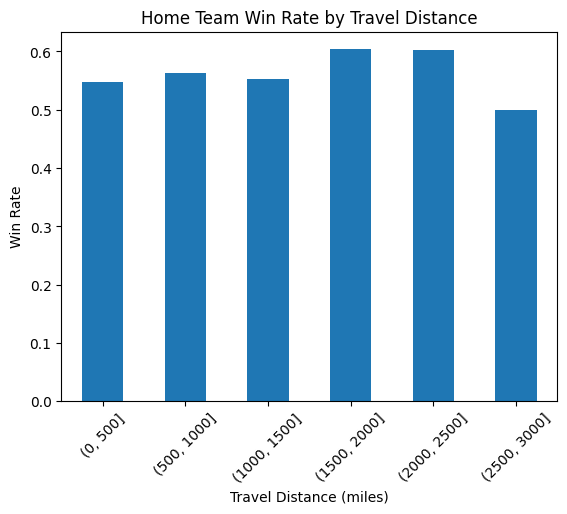

In [39]:
import matplotlib.pyplot as plt

# Plot the home win rate by travel distance bin
win_rate_by_distance.plot(kind='bar')
plt.title('Home Team Win Rate by Travel Distance')
plt.xlabel('Travel Distance (miles)')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [40]:
# Calculate the average temperature and wind speed for each home stadium
normal_conditions_by_stadium = merged_game_data.groupby('home_stadium')[['weather_temperature', 'weather_wind_mph']].mean()

# Display the normal conditions for each stadium
print(normal_conditions_by_stadium)

                            weather_temperature  weather_wind_mph
home_stadium                                                     
acrisure stadium                      48.966851          7.000000
allegiant stadium                     64.220779          5.974026
arrowhead stadium                     51.163743          8.888889
at&t stadium                          68.900000          3.650000
bank of america stadium               60.086420          5.796296
caesars superdome                     71.664671          0.269461
empower field at mile high            53.266010          7.822660
fedexfield                            55.161491          6.888199
firstenergy stadium                   50.141104         10.288344
ford field                            72.000000          0.000000
gillette stadium                      50.882353          8.796791
hard rock stadium                     78.939759          8.192771
highmark stadium                      48.988304          8.619883
lambeau fi

In [41]:
# Step 2a: Create a new column for temperature deviation (difference from home stadium average)
merged_game_data = merged_game_data.merge(normal_conditions_by_stadium, on='home_stadium', suffixes=('', '_home_avg'))

# Step 2b: Create a new column indicating if the game temperature was above, below, or near the home average
merged_game_data['temperature_condition'] = merged_game_data.apply(
    lambda row: 'hotter' if row['weather_temperature'] > row['weather_temperature_home_avg'] + 5 else (
                'colder' if row['weather_temperature'] < row['weather_temperature_home_avg'] - 5 else 'normal'),
    axis=1
)

# Step 2c: Create a new column indicating if the wind was stronger or weaker than home stadium's average
merged_game_data['wind_condition'] = merged_game_data.apply(
    lambda row: 'windier' if row['weather_wind_mph'] > row['weather_wind_mph_home_avg'] + 5 else (
                'calmer' if row['weather_wind_mph'] < row['weather_wind_mph_home_avg'] - 5 else 'normal'),
    axis=1
)


In [42]:

# Verify the new columns
merged_game_data[['temperature_condition', 'wind_condition']].head()

,temperature_condition,wind_condition
0,hotter,normal
1,hotter,normal
2,hotter,normal
3,hotter,normal
4,hotter,windier


temperature_condition
colder    3.340407
hotter    2.778559
normal    1.765737
Name: home_win_margin, dtype: float64


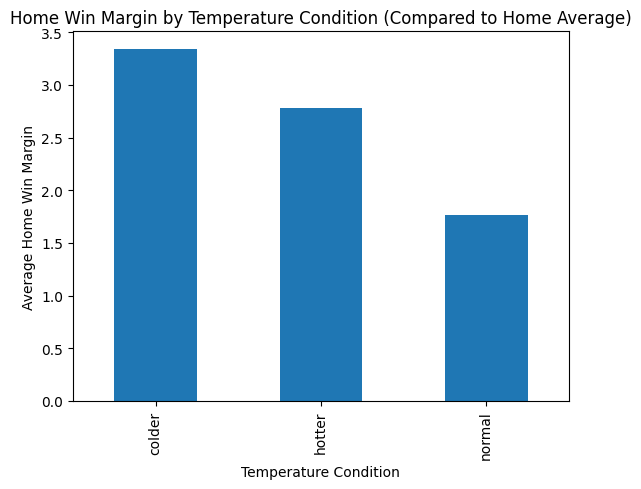

In [43]:
# Calculate the home win margin by temperature condition
win_margin_by_temp_condition = merged_game_data.groupby('temperature_condition')['home_win_margin'].mean()

# Display the result
print(win_margin_by_temp_condition)

# Plot the results
win_margin_by_temp_condition.plot(kind='bar')
plt.title('Home Win Margin by Temperature Condition (Compared to Home Average)')
plt.xlabel('Temperature Condition')
plt.ylabel('Average Home Win Margin')
plt.show()

wind_condition
calmer     2.180662
normal     2.201946
windier    3.568182
Name: home_win_margin, dtype: float64


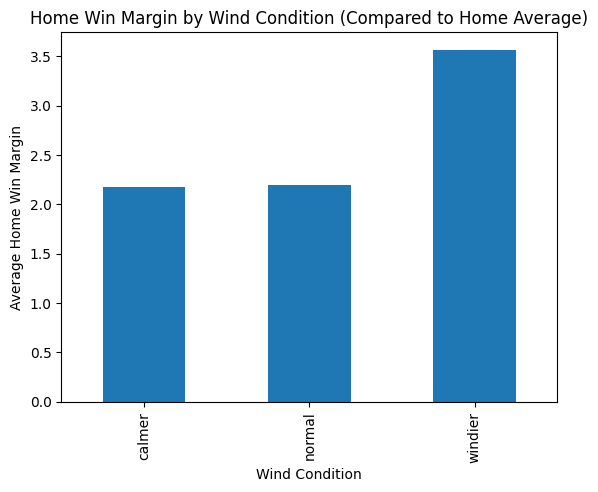

In [44]:
# Calculate the home win margin by wind condition
win_margin_by_wind_condition = merged_game_data.groupby('wind_condition')['home_win_margin'].mean()

# Display the result
print(win_margin_by_wind_condition)

# Plot the results
win_margin_by_wind_condition.plot(kind='bar')
plt.title('Home Win Margin by Wind Condition (Compared to Home Average)')
plt.xlabel('Wind Condition')
plt.ylabel('Average Home Win Margin')
plt.show()

In [45]:
# Combine the travel distance bins and temperature/wind conditions
merged_game_data['distance_temp_combo'] = merged_game_data['travel_distance_bin'].astype(str) + '_' + merged_game_data['temperature_condition']
merged_game_data['distance_wind_combo'] = merged_game_data['travel_distance_bin'].astype(str) + '_' + merged_game_data['wind_condition']

# Calculate win rate by combined travel and temperature conditions
win_rate_by_distance_temp = merged_game_data.groupby('distance_temp_combo')['home_team_won'].mean()
win_rate_by_distance_wind = merged_game_data.groupby('distance_wind_combo')['home_team_won'].mean()

# Display the results
print(win_rate_by_distance_temp)
print(win_rate_by_distance_wind)

distance_temp_combo
(0, 500]_colder        0.547059
(0, 500]_hotter        0.590625
(0, 500]_normal        0.532350
(1000, 1500]_colder    0.550661
(1000, 1500]_hotter    0.537313
(1000, 1500]_normal    0.558059
(1500, 2000]_colder    0.663265
(1500, 2000]_hotter    0.572917
(1500, 2000]_normal    0.593525
(2000, 2500]_colder    0.648649
(2000, 2500]_hotter    0.640625
(2000, 2500]_normal    0.569132
(2500, 3000]_colder    0.500000
(2500, 3000]_hotter    0.600000
(2500, 3000]_normal    0.461538
(500, 1000]_colder     0.573727
(500, 1000]_hotter     0.590659
(500, 1000]_normal     0.547718
nan_colder             0.444444
nan_hotter             0.777778
nan_normal             0.368421
Name: home_team_won, dtype: float64
distance_wind_combo
(0, 500]_calmer         0.487395
(0, 500]_normal         0.549807
(0, 500]_windier        0.582677
(1000, 1500]_calmer     0.465753
(1000, 1500]_normal     0.554745
(1000, 1500]_windier    0.590909
(1500, 2000]_calmer     0.629630
(1500, 2000]_normal  

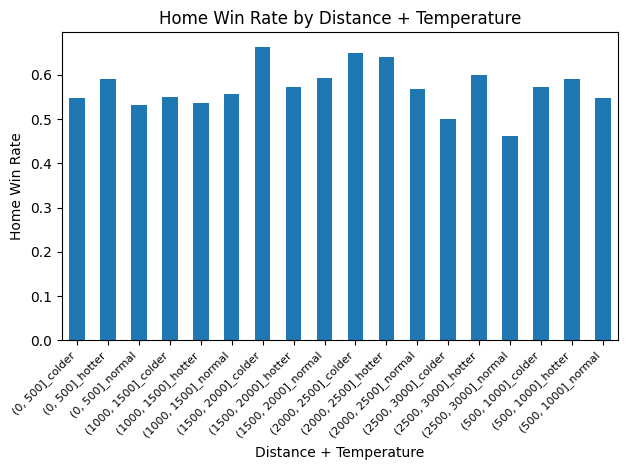

In [46]:
# Remove combinations that have 'NaN' in their labels
win_rate_by_distance_temp_cleaned = win_rate_by_distance_temp[~win_rate_by_distance_temp.index.str.contains('nan')]

# Plot with cleaned labels and no NaN combinations
win_rate_by_distance_temp_cleaned.plot(kind='bar')
plt.title('Home Win Rate by Distance + Temperature')
plt.xlabel('Distance + Temperature')
plt.ylabel('Home Win Rate')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust rotation and font size for better readability
plt.tight_layout()
plt.show()

In [47]:
# Combine travel distance bins and wind conditions into a new column
merged_game_data['distance_wind_combo'] = merged_game_data['travel_distance_bin'].astype(str) + '_' + merged_game_data['wind_condition']

# Calculate home win rate by combined travel distance and wind condition
win_rate_by_distance_wind = merged_game_data.groupby('distance_wind_combo')['home_team_won'].mean()

# Display the result
print(win_rate_by_distance_wind)

distance_wind_combo
(0, 500]_calmer         0.487395
(0, 500]_normal         0.549807
(0, 500]_windier        0.582677
(1000, 1500]_calmer     0.465753
(1000, 1500]_normal     0.554745
(1000, 1500]_windier    0.590909
(1500, 2000]_calmer     0.629630
(1500, 2000]_normal     0.602941
(1500, 2000]_windier    0.594595
(2000, 2500]_calmer     0.620000
(2000, 2500]_normal     0.595652
(2000, 2500]_windier    0.650000
(2500, 3000]_calmer     0.500000
(2500, 3000]_normal     0.452055
(2500, 3000]_windier    0.818182
(500, 1000]_calmer      0.580357
(500, 1000]_normal      0.555788
(500, 1000]_windier     0.612903
nan_calmer              0.250000
nan_normal              0.517241
nan_windier             0.500000
Name: home_team_won, dtype: float64


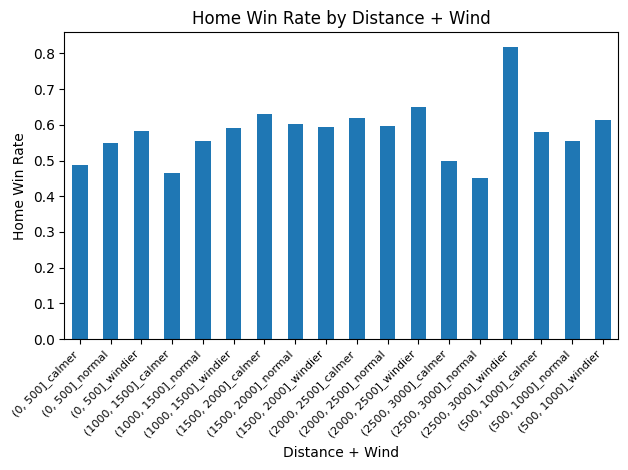

In [48]:
# Remove combinations that have 'NaN' in their labels
win_rate_by_distance_wind_cleaned = win_rate_by_distance_wind[~win_rate_by_distance_wind.index.str.contains('nan')]

# Plot with cleaned labels and no NaN combinations
win_rate_by_distance_wind_cleaned.plot(kind='bar')
plt.title('Home Win Rate by Distance + Wind')
plt.xlabel('Distance + Wind')
plt.ylabel('Home Win Rate')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust rotation and font size for better readability
plt.tight_layout()
plt.show()

In [49]:
# Separate the data into regular season and playoff games
regular_season = merged_game_data[merged_game_data['schedule_playoff'] == False]['home_win_margin']
playoff_games = merged_game_data[merged_game_data['schedule_playoff'] == True]['home_win_margin']

# Calculate the average win margin for regular season and playoff games
avg_win_margin_regular_season = regular_season.mean()
avg_win_margin_playoff = playoff_games.mean()

print(f'Average Home Win Margin (Regular Season): {avg_win_margin_regular_season}')
print(f'Average Home Win Margin (Playoffs): {avg_win_margin_playoff}')

Average Home Win Margin (Regular Season): 2.2531425256236703
Average Home Win Margin (Playoffs): 3.9118942731277535


In [50]:
# Separate the data into regular season and playoff games
regular_season_wins = merged_game_data[merged_game_data['schedule_playoff'] == False]['home_team_won']
playoff_wins = merged_game_data[merged_game_data['schedule_playoff'] == True]['home_team_won']

# Calculate home win rate for regular season and playoff games
win_rate_regular_season = regular_season_wins.mean()
win_rate_playoff = playoff_wins.mean()

print(f'Home Win Rate (Regular Season): {win_rate_regular_season}')
print(f'Home Win Rate (Playoffs): {win_rate_playoff}')

Home Win Rate (Regular Season): 0.5606265712628118
Home Win Rate (Playoffs): 0.6035242290748899


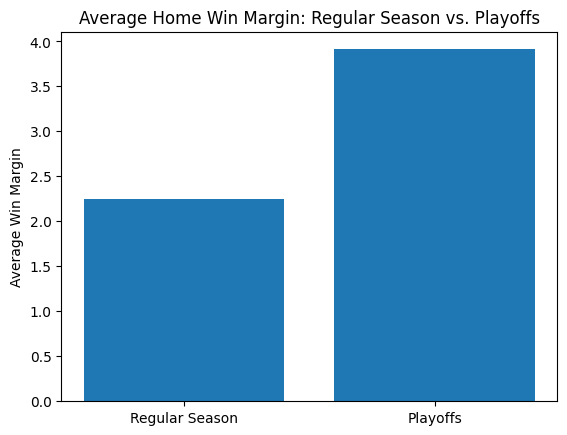

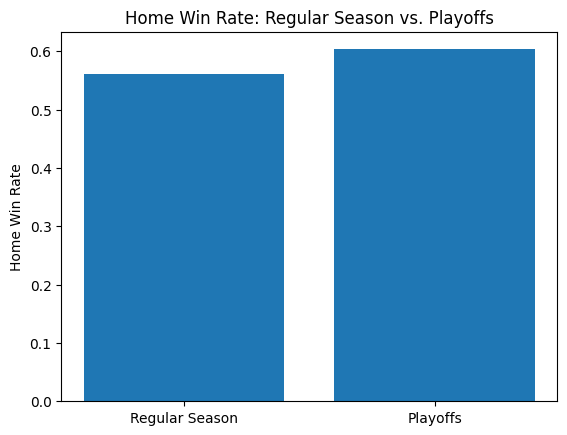

In [51]:
import matplotlib.pyplot as plt

# Create bar plots for win margin
plt.bar(['Regular Season', 'Playoffs'], [avg_win_margin_regular_season, avg_win_margin_playoff])
plt.title('Average Home Win Margin: Regular Season vs. Playoffs')
plt.ylabel('Average Win Margin')
plt.show()

# Create bar plots for win rate
plt.bar(['Regular Season', 'Playoffs'], [win_rate_regular_season, win_rate_playoff])
plt.title('Home Win Rate: Regular Season vs. Playoffs')
plt.ylabel('Home Win Rate')
plt.show()

In [52]:
merged_game_data.head()

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,...,home_team_won,temperature_category,wind_category,travel_distance_bin,weather_temperature_home_avg,weather_wind_mph_home_avg,temperature_condition,wind_condition,distance_temp_combo,distance_wind_combo
0,2005,1,False,New England Patriots,30,20,Las Vegas Raiders,Gillette Stadium,71,9,...,1,hot,low,"(2000, 2500]",50.882353,8.796791,hotter,normal,"(2000, 2500]_hotter","(2000, 2500]_normal"
1,2005,1,False,New England Patriots,30,20,Las Vegas Raiders,Gillette Stadium,71,9,...,1,hot,low,"(2000, 2500]",50.882353,8.796791,hotter,normal,"(2000, 2500]_hotter","(2000, 2500]_normal"
2,2005,1,False,Baltimore Ravens,7,24,Indianapolis Colts,M&T Bank Stadium,69,4,...,0,moderate,low,"(500, 1000]",55.836257,6.163743,hotter,normal,"(500, 1000]_hotter","(500, 1000]_normal"
3,2005,1,False,Buffalo Bills,22,7,Houston Texans,Ralph Wilson Stadium,64,8,...,1,moderate,low,"(1000, 1500]",48.988304,8.619883,hotter,normal,"(1000, 1500]_hotter","(1000, 1500]_normal"
4,2005,1,False,Carolina Panthers,20,23,New Orleans Saints,Bank of America Stadium,74,12,...,0,hot,moderate,"(500, 1000]",60.086420,5.796296,hotter,windier,"(500, 1000]_hotter","(500, 1000]_windier"


In [ ]:
#Creating the rivalries in the dataset to analyze our question further

In [54]:
# Dictionary mapping each team to its biggest rival(s)
rivalries = {
    'Buffalo Bills': ['New England Patriots', 'Miami Dolphins'],
    'Miami Dolphins': ['New England Patriots'],
    'New England Patriots': ['Buffalo Bills', 'New York Jets', 'Indianapolis Colts'],
    'New York Jets': ['New England Patriots', 'Miami Dolphins'],

    'Baltimore Ravens': ['Pittsburgh Steelers'],
    'Cincinnati Bengals': ['Pittsburgh Steelers'],
    'Cleveland Browns': ['Pittsburgh Steelers'],
    'Pittsburgh Steelers': ['Baltimore Ravens', 'Cincinnati Bengals'],

    'Houston Texans': ['Indianapolis Colts'],
    'Indianapolis Colts': ['New England Patriots', 'Houston Texans'],
    'Jacksonville Jaguars': ['Tennessee Titans'],
    'Tennessee Titans': ['Indianapolis Colts'],

    'Denver Broncos': ['New England Patriots', 'Kansas City Chiefs'],
    'Kansas City Chiefs': ['Denver Broncos'],
    'Las Vegas Raiders': ['Denver Broncos'],
    'Los Angeles Chargers': ['Las Vegas Raiders'],

    'Dallas Cowboys': ['Washington Commanders', 'New York Giants', 'Philadelphia Eagles'],
    'New York Giants': ['Dallas Cowboys'],
    'Philadelphia Eagles': ['Dallas Cowboys'],
    'Washington Commanders': ['Dallas Cowboys'],

    'Chicago Bears': ['Green Bay Packers'],
    'Detroit Lions': ['Green Bay Packers'],
    'Green Bay Packers': ['Chicago Bears', 'Minnesota Vikings'],
    'Minnesota Vikings': ['Green Bay Packers'],

    'Atlanta Falcons': ['New Orleans Saints'],
    'Carolina Panthers': ['Atlanta Falcons'],
    'New Orleans Saints': ['Atlanta Falcons'],
    'Tampa Bay Buccaneers': ['Atlanta Falcons'],

    'Arizona Cardinals': ['Seattle Seahawks'],
    'Los Angeles Rams': ['San Francisco 49ers'],
    'San Francisco 49ers': ['Seattle Seahawks'],
    'Seattle Seahawks': ['Arizona Cardinals', 'San Francisco 49ers']
}

# Function to check if a game is a rivalry (based on home and away teams)
def is_rivalry_game(home_team, away_team, rivalries):
    if home_team in rivalries and away_team in rivalries[home_team]:
        return True
    return False

# Create a new column 'is_rivalry' in the dataset
merged_game_data['is_rivalry'] = merged_game_data.apply(lambda row: is_rivalry_game(row['team_home'], row['team_away'], rivalries), axis=1)

# Check the first few rows to ensure 'is_rivalry' is marked correctly
print(merged_game_data[['team_home', 'team_away', 'is_rivalry']].head(60))

                team_home              team_away  is_rivalry
0    New England Patriots      Las Vegas Raiders       False
1    New England Patriots      Las Vegas Raiders       False
2        Baltimore Ravens     Indianapolis Colts       False
3           Buffalo Bills         Houston Texans       False
4       Carolina Panthers     New Orleans Saints       False
5        Cleveland Browns     Cincinnati Bengals       False
6           Detroit Lions      Green Bay Packers        True
7    Jacksonville Jaguars       Seattle Seahawks       False
8      Kansas City Chiefs          New York Jets       False
9          Miami Dolphins         Denver Broncos       False
10      Minnesota Vikings   Tampa Bay Buccaneers       False
11        New York Giants      Arizona Cardinals       False
12    Pittsburgh Steelers       Tennessee Titans       False
13    Pittsburgh Steelers       Tennessee Titans       False
14   Los Angeles Chargers         Dallas Cowboys       False
15    San Francisco 49er

In [55]:
# Separate rivalry and non-rivalry games
rivalry_games = merged_game_data[merged_game_data['is_rivalry'] == True]
non_rivalry_games = merged_game_data[merged_game_data['is_rivalry'] == False]

# Calculate average home win margin for rivalry and non-rivalry games
avg_win_margin_rivalry = rivalry_games['home_win_margin'].mean()
avg_win_margin_non_rivalry = non_rivalry_games['home_win_margin'].mean()

print(f'Average Home Win Margin (Rivalry Games): {avg_win_margin_rivalry}')
print(f'Average Home Win Margin (Non-Rivalry Games): {avg_win_margin_non_rivalry}')

Average Home Win Margin (Rivalry Games): 1.5593824228028503
Average Home Win Margin (Non-Rivalry Games): 2.464003511852502


In [56]:
# Calculate home win rate for rivalry and non-rivalry games
win_rate_rivalry = rivalry_games['home_team_won'].mean()
win_rate_non_rivalry = non_rivalry_games['home_team_won'].mean()

print(f'Home Win Rate (Rivalry Games): {win_rate_rivalry}')
print(f'Home Win Rate (Non-Rivalry Games): {win_rate_non_rivalry}')

Home Win Rate (Rivalry Games): 0.517814726840855
Home Win Rate (Non-Rivalry Games): 0.5706760316066726


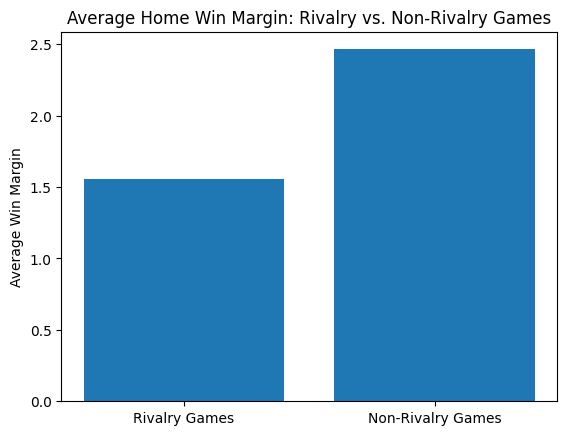

In [57]:
import matplotlib.pyplot as plt

# Bar plot for win margin
plt.bar(['Rivalry Games', 'Non-Rivalry Games'], [avg_win_margin_rivalry, avg_win_margin_non_rivalry])
plt.title('Average Home Win Margin: Rivalry vs. Non-Rivalry Games')
plt.ylabel('Average Win Margin')
plt.show()

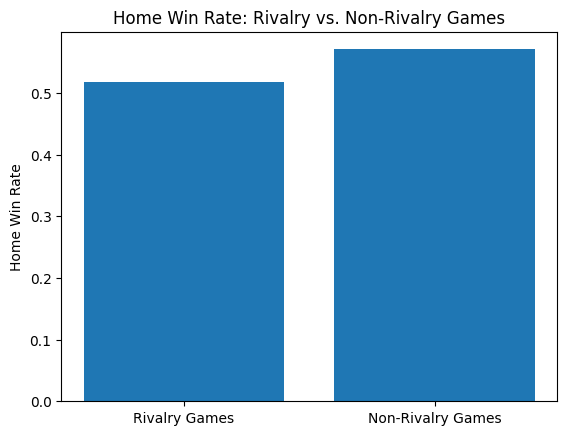

In [58]:
# Bar plot for win rate
plt.bar(['Rivalry Games', 'Non-Rivalry Games'], [win_rate_rivalry, win_rate_non_rivalry])
plt.title('Home Win Rate: Rivalry vs. Non-Rivalry Games')
plt.ylabel('Home Win Rate')
plt.show()